## Imports

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import urllib.request
import json
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc
import os.path
import os
import zipfile
import shutil

## Download Data Files

### The Echo Nest Taste Profile Subset

http://labrosa.ee.columbia.edu/millionsong/sites/default/files/challenge/train_triplets.txt.zip

In [2]:
if not os.path.isfile("train_triplets.txt.zip"):
    urllib.request.urlretrieve("http://labrosa.ee.columbia.edu/millionsong/sites/default/files/challenge/train_triplets.txt.zip", "train_triplets.txt.zip")

### The athletes information of 2021 Olympics in Tokyo
https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo/download

In [3]:
# CURRENTLY DOWNLOADING FROM CODE THROWS ERRORS WHEN TRYING TO READ THE FILE, 
# MANUAL UPLOAD

# urllib.request.urlretrieve("https://www.kaggle.com/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo?resource=download&select=Athletes.xlsx", "Athletes.xlsx")[1]

### Yelp_academic_dataset_business


https://github.com/melqkiades/yelp/blob/master/notebooks/yelp_academic_dataset_business.json

In [4]:
if not os.path.isfile("yelp_academic_dataset_business.json"):
    urllib.request.urlretrieve("https://raw.githubusercontent.com/melqkiades/yelp/master/notebooks/yelp_academic_dataset_business.json", "yelp_academic_dataset_business.json")

### Online News Popularity Dataset

https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip

In [5]:
if not os.path.isfile("OnlineNewsPopularity.zip"):
    urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip", "OnlineNewsPopularity.zip")

### Dry bean dataset

https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip

In [6]:
if not os.path.isfile("DryBeanDataset.zip"):
    urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip", "DryBeanDataset.zip")

## **(Tutorial) Binarizing data**

Following is a sample of binarizing listen counts in Million Song Dataset
### The Echo Nest Taste Profile Subset 
http://labrosa.ee.columbia.edu/millionsong/sites/default/files/challenge/train_triplets.txt.zip

In [7]:
listen_count = pd.read_csv('train_triplets.txt.zip', header=None, delimiter='\t')
listen_count.head()  # user - song - count

,0,1,2
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [8]:
np.max(listen_count[2])

9667

Binarizing and visualizing listen counts

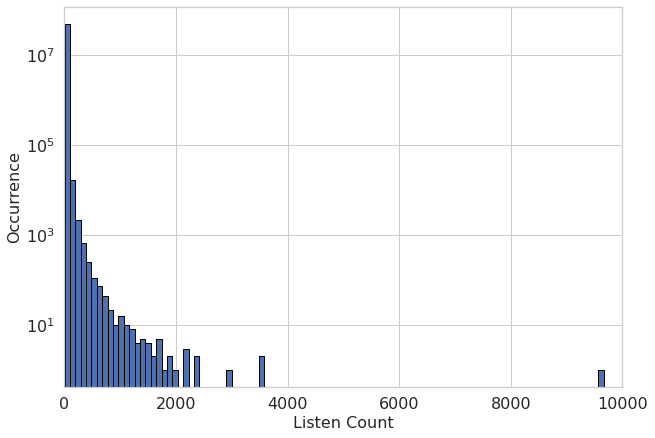

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.hist(listen_count[2], bins = 100, edgecolor='black')
plt.yscale('log', nonposy='clip')
# plt.yscale('log', nonpositive='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,10000])
_ = plt.xlabel('Listen Count', fontsize=16)
_ = plt.ylabel('Occurrence', fontsize=16)

## **Task 1.1 Read data from Athletes.xlsx file and keep it in a proper type for the following operations**

### The athletes information of 2021 Olympics in Tokyo
https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo/download

In [10]:
# write your code here
df = pd.read_excel("Athletes.xlsx")
df

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball
...,...,...,...
11080,ZWICKER Martin Detlef,Germany,Hockey
11081,ZWOLINSKA Klaudia,Poland,Canoe Slalom
11082,ZYKOVA Yulia,ROC,Shooting
11083,ZYUZINA Ekaterina,ROC,Sailing


## **Task 1.2 Extracting the data in column 'NOC' and encoding them, then binarizing and visualizing them (number of athletes on x-axis, number of countries on y-axis)**

In [11]:
# Number encode NOC values
noc_id_map = {}
id_noc_map = {}
for i, noc in enumerate(df["NOC"].unique()):
    noc_id_map.update({noc: i})
    id_noc_map.update({i: noc})
    df["NOC"].replace(noc, i, inplace=True)
df

,Name,NOC,Discipline
0,AALERUD Katrine,0,Cycling Road
1,ABAD Nestor,1,Artistic Gymnastics
2,ABAGNALE Giovanni,2,Rowing
3,ABALDE Alberto,1,Basketball
4,ABALDE Tamara,1,Basketball
...,...,...,...
11080,ZWICKER Martin Detlef,18,Hockey
11081,ZWOLINSKA Klaudia,49,Canoe Slalom
11082,ZYKOVA Yulia,31,Shooting
11083,ZYUZINA Ekaterina,31,Sailing


In [12]:
np.max(df["NOC"])

205

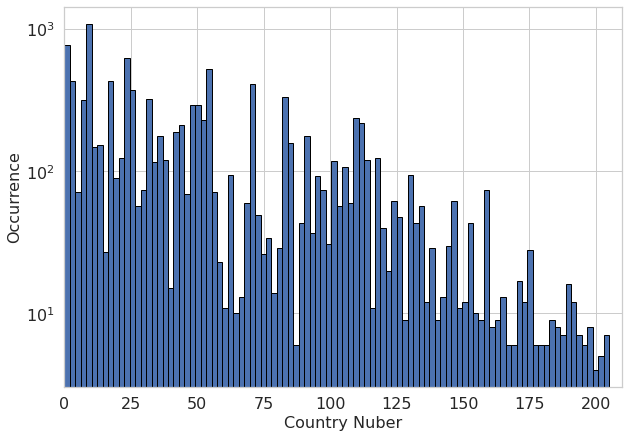

In [13]:
# Visualize
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.hist(df["NOC"], bins = 100, edgecolor='black')
plt.yscale('log', nonposy='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,210])
_ = plt.xlabel('Country Nuber', fontsize=16)
_ = plt.ylabel('Occurrence', fontsize=16)

## **(Tutorial) Quantizing data**

In [14]:
# create 20 random numbers in the range (0,100)
small_counts = np.random.randint(0, 100, 20) 
small_counts

array([75, 22, 70, 39, 70, 97, 95, 84, 95, 23, 59, 60, 73, 60,  0, 69, 96,
       24, 64, 19])

In [15]:
# divided by 10 to project digits into the range (0,10) 
np.floor_divide(small_counts, 10)

array([7, 2, 7, 3, 7, 9, 9, 8, 9, 2, 5, 6, 7, 6, 0, 6, 9, 2, 6, 1])

In [16]:
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

### Example: computing deciles of Yelp business review counts
Yelp_academic_dataset_business
https://github.com/melqkiades/yelp/blob/master/notebooks/yelp_academic_dataset_business.json

In [17]:
def load_json_df(filename, num_bytes = -1):
    '''Load the first `num_bytes` of the filename as a json blob, convert each line into a row in a Pandas data frame.'''
    fs = open(filename, encoding='utf-8')
    df = pd.DataFrame([json.loads(x) for x in fs.readlines(num_bytes)])
    fs.close()
    return df

In [18]:
biz_df = load_json_df('yelp_academic_dataset_business.json')
biz_df.shape

(15585, 15)

In [19]:
biz_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,O_X3PGhk3Y5JWVi866qlJg,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",True,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,29,Turf Paradise Race Course,[],-112.092329,AZ,4.0,33.638573,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",business
1,QbrM7wqtmoNncqjc6GtFaQ,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},True,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,3,Sam's Club Members Only,[],-112.234755,AZ,3.5,33.648545,"{'Parking': {'garage': False, 'street': False,...",business
2,7lbvsGKzhjuX3oJtaXJvOg,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,7,Forever 21,[],-111.964485,AZ,3.5,33.383123,"{'Parking': {'garage': False, 'street': False,...",business
3,gjxoKVsRJwEoa8zd9XxlAw,"912 W Sycamore Pl\nChandler, AZ 85225","{'Monday': {'close': '19:00', 'open': '06:00'}...",True,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,4,Loving Hands Pet Care,[],-111.857818,AZ,5.0,33.356472,{},business
4,V28yjMqyZnbCtabroJN_aA,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},True,"[Veterinarians, Pets]",Phoenix,3,Amec Mid-City Animal Hospital,[],-112.097232,AZ,5.0,33.538493,{},business


In [20]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]) 
deciles 

0.1     3.0
0.2     3.0
0.3     4.0
0.4     5.0
0.5     6.0
0.6     8.0
0.7    13.0
0.8    24.0
0.9    56.0
Name: review_count, dtype: float64

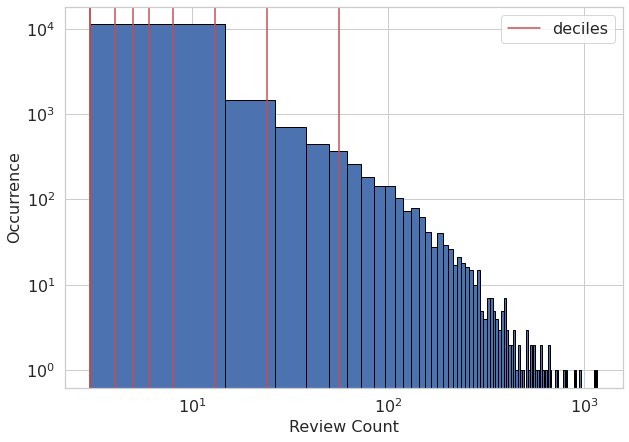

In [21]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
biz_df['review_count'].hist(ax=ax, bins=100, edgecolor='black') 
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=16) 
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xscale('log', nonpositive='clip')  # Throws errors for some reason
# ax.set_yscale('log', nonpositive='clip')
ax.tick_params(labelsize=16)
_ = ax.set_xlabel('Review Count', fontsize=16) 
_ = ax.set_ylabel('Occurrence', fontsize=16)

## Task 2. Computing the quantiles of the number of athletes from each country and visualizing the histogram (data was used in task 1). Applying log transform on the number of athletes and visualizing the histogram again.

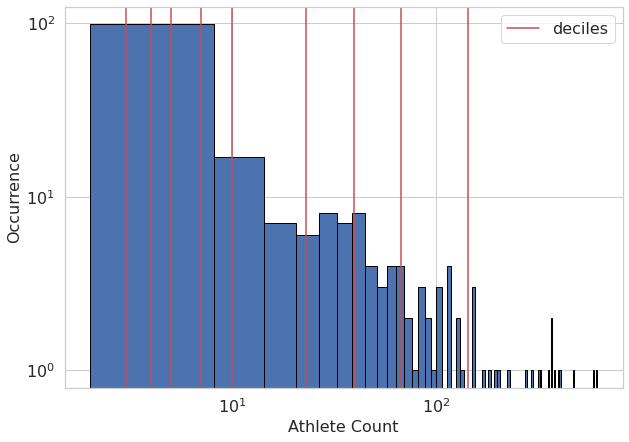

In [22]:
# Get counts
df_counts = []
for i, v in df["NOC"].value_counts().iteritems():
    df_counts.append([i, v])
df_counts = pd.DataFrame(df_counts, columns=["noc", "count"])

# Deciles
deciles = df_counts["count"].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]) 

# Visualize
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
df_counts['count'].hist(ax=ax, bins=100, edgecolor='black') 
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=16) 
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xscale('log', nonpositive='clip')  # Throws errors for some reason
# ax.set_yscale('log', nonpositive='clip')
ax.tick_params(labelsize=16)
_ = ax.set_xlabel('Athlete Count', fontsize=16) 
_ = ax.set_ylabel('Occurrence', fontsize=16)

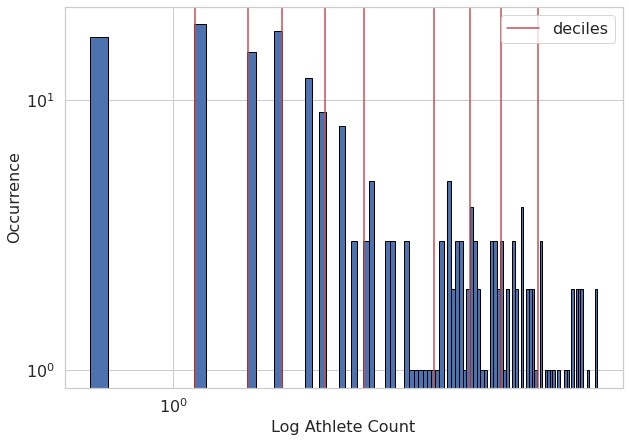

In [23]:
# Log transform counts
df_counts["log_count"] = np.log(df_counts["count"])

# Deciles
deciles = df_counts["log_count"].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]) 

# Visualize
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
df_counts['log_count'].hist(ax=ax, bins=100, edgecolor='black') 
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=16) 
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xscale('log', nonpositive='clip')  # Throws errors for some reason
# ax.set_yscale('log', nonpositive='clip')
ax.tick_params(labelsize=16)
_ = ax.set_xlabel('Log Athlete Count', fontsize=16) 
_ = ax.set_ylabel('Occurrence', fontsize=16)

## Question 1. Comparing the histograms before and after applying log transform and answer the question: why do we need to apply log transform on some data?

**Answer to Q1**: The log transform is a normalization method. By applying a log transform, very large numbers are reduced more than small numbers which will bring the larger counts closer in value to the smaller counts. This changes the distribution of the values of the counts, which allows for better, more even distributions of the values when practicing binning.

---


## **(Tutorial) Box-Cox transform**

In [24]:
x = np.arange(0.001, 3, 0.01)
lambda0 = np.log(x)
one_quarter = (x**0.25 - 1)/0.25
square_root = (x**0.5 - 1)/0.5
three_quarters = (x**0.75 - 1)/0.75
one_point_five = (x**1.5 - 1)/1.5

Text(0.5, 1.0, 'Box-Cox Transforms')

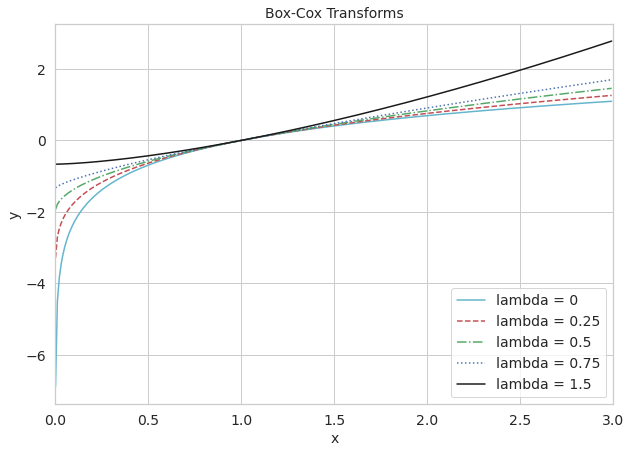

In [25]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(x, lambda0, 'c', 
         x, one_quarter, 'r--', 
         x, square_root, 'g-.', 
         x, three_quarters, 'b:',
         x, one_point_five, 'k')
plt.legend(['lambda = 0', 'lambda = 0.25', 'lambda = 0.5', 'lambda = 0.75', 'lambda = 1.5'], 
           loc='lower right',
           prop={'size': 14})
ax.tick_params(labelsize=14)
ax.set_xlim([0.0,3.0])
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Box-Cox Transforms', fontsize=14)

## Example: Visualizing the histograms of original, log transformed, and Box-Cox transformed review counts

In [26]:
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
biz_df['rc_bc'] = rc_bc
biz_df['rc_log'] = rc_log

Text(0, 0.5, 'Occurrence')

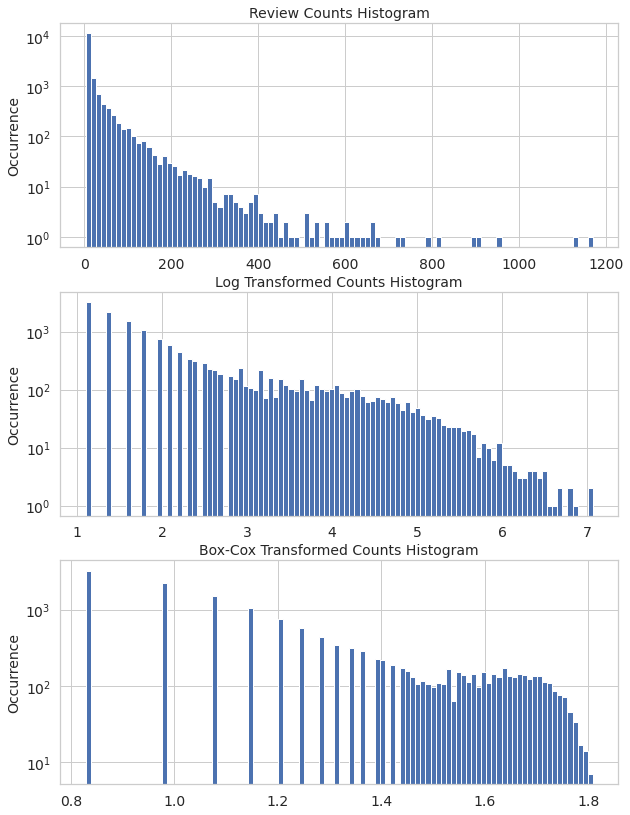

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 14))

# 원본 리뷰 카운트 히스토그램
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
# ax1.set_yscale('log', nonpositive='clip')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# 로그 변환된 리뷰 카운트
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
# ax2.set_yscale('log', nonpositive='clip')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# Box-Cox 변환된 리뷰 카운트
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
# ax3.set_yscale('log', nonpositive='clip')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

## **Task 3. Visualizing the histograms of original, log transformed, and Box-Cox transformed athletes numbers (data used in task 1 and task 2)**

Text(0.5, 1.0, 'Box-Cox Transforms')

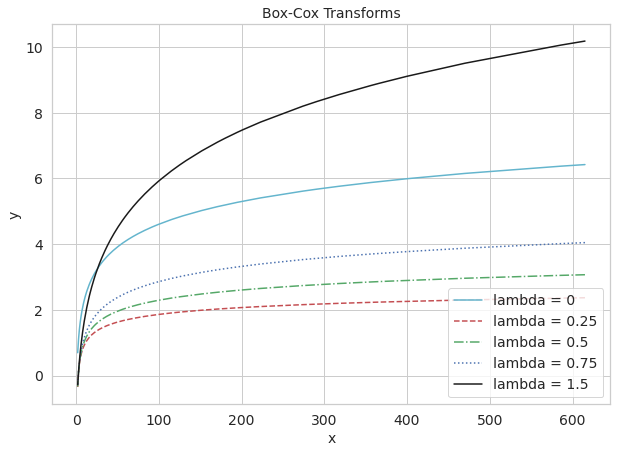

In [28]:
one_quarter = (df_counts["log_count"]**0.25 - 1)/0.25
square_root = (df_counts["log_count"]**0.5 - 1)/0.5
three_quarters = (df_counts["log_count"]**0.75 - 1)/0.75
one_point_five = (df_counts["log_count"]**1.5 - 1)/1.5

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(df_counts["count"], df_counts["log_count"], 'c', 
         df_counts["count"], one_quarter, 'r--', 
         df_counts["count"], square_root, 'g-.', 
         df_counts["count"], three_quarters, 'b:',
         df_counts["count"], one_point_five, 'k')
plt.legend(['lambda = 0', 'lambda = 0.25', 'lambda = 0.5', 'lambda = 0.75', 'lambda = 1.5'], 
           loc='lower right',
           prop={'size': 14})
ax.tick_params(labelsize=14)
# ax.set_xlim([0.0,3.0])
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Box-Cox Transforms', fontsize=14)

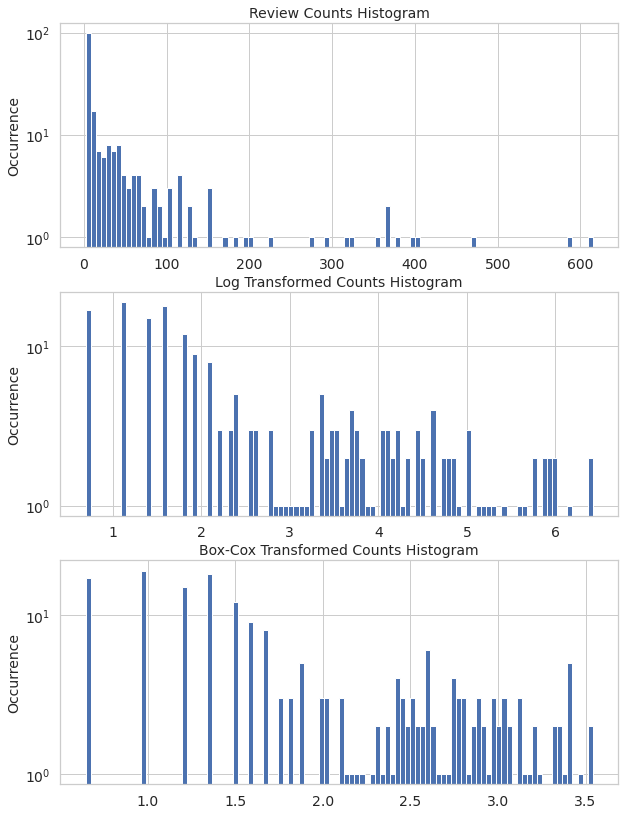

In [29]:
# Box-cox transform counts
df_counts["box_count"], tmp = stats.boxcox(df_counts["count"])

# Visualize
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 14))

df_counts['count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

df_counts['log_count'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

df_counts['box_count'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

fig.show()

## Question 2. Listing another transform method other than log and box-cox transform. Explain when to use them.

**Answer to Q2:** Another common transformation is applying a square root transform. This can be done to data that does not have a standard normal statistical distribution in order to bring it closer to a standard normal distribution. Another application is if two variables have a non-linear relationship, applying a square root transformation may make it a linear one. This transformation also - similarly to the log transform - reduces large values at a greater rate than small values. Bringing the variation between values down reduces the weightiness of large values during calculations in machine learning algorithms.

---


## Feature scaling example
**Online News Popularity Dataset**: https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip

In [30]:
with zipfile.ZipFile("OnlineNewsPopularity.zip", 'r') as zip_ref:
    zip_ref.extractall("")
shutil.move("OnlineNewsPopularity/OnlineNewsPopularity.csv", "OnlineNewsPopularity.csv")
shutil.rmtree("OnlineNewsPopularity")
os.remove("OnlineNewsPopularity.zip")

In [31]:
news_df = pd.read_csv('OnlineNewsPopularity.csv', delimiter=', ',engine = 'python') 
news_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [32]:
# Min-max scaling
news_df['minmax'] = preproc.minmax_scale(news_df[['n_tokens_content']])
news_df['minmax'].values

array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

In [33]:
# Standardization
news_df['standardized'] = preproc.StandardScaler().fit_transform(news_df[['n_tokens_content']])
news_df['standardized'].values

array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

In [34]:
# L2-normalization
news_df['l2_normalized'] = preproc.normalize(news_df[['n_tokens_content']], axis=0)
news_df['l2_normalized'].values

array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

Text(0.5, 39.49999999999994, 'L2-normalized word count')

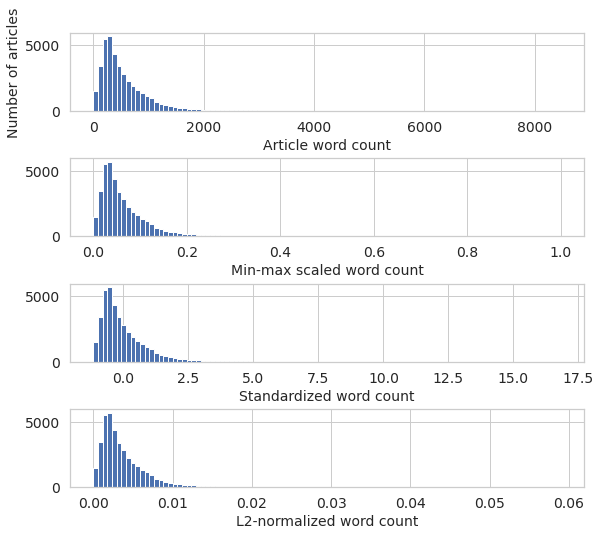

In [35]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8, 7))
fig.tight_layout(h_pad=2.0)

news_df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

news_df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
# ax2.set_ylabel('Number of articles', fontsize=14)

news_df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
# ax3.set_ylabel('Number of articles', fontsize=14)

news_df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
# ax4.set_ylabel('Number of articles', fontsize=14)

##  Task 4. Visualizing the histograms of original and scaled data (the data used in the previous tasks)

Text(149.125, 0.5, 'Occurances')

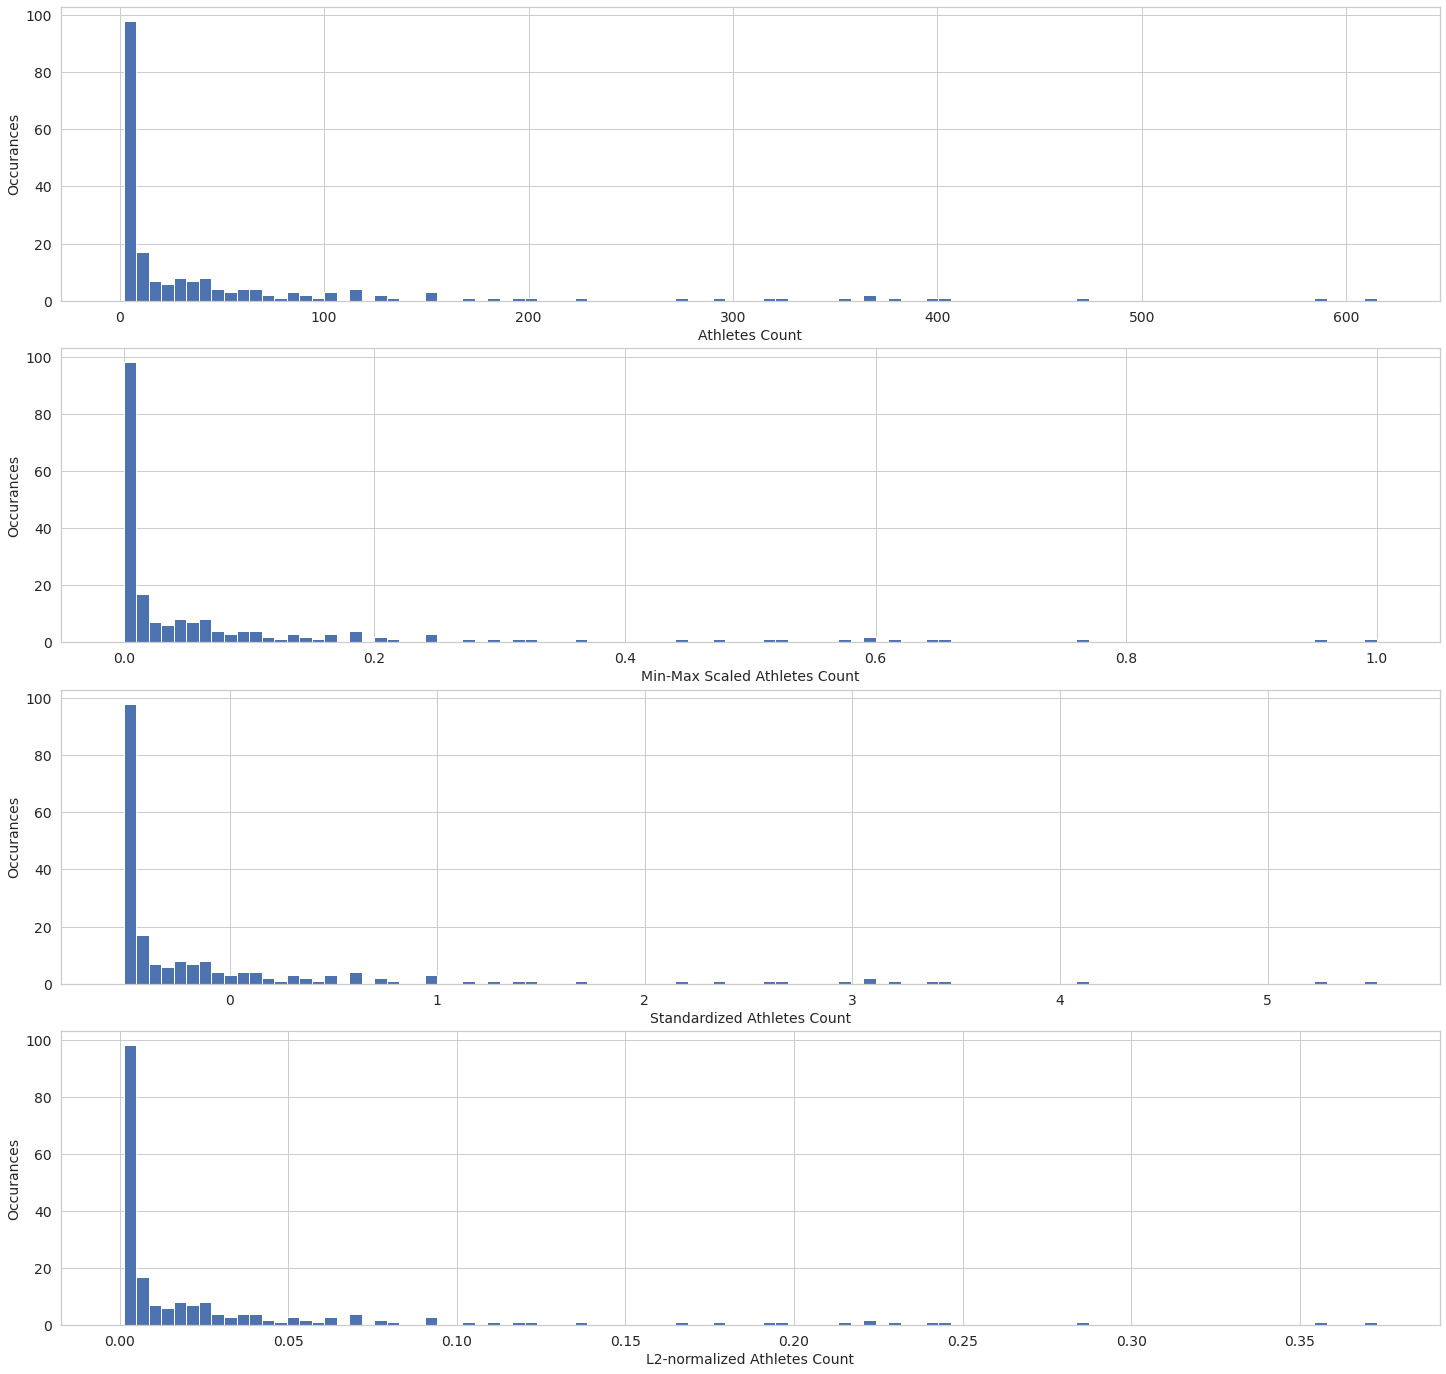

In [36]:
# Scale transforms
df_counts['minmax'] = preproc.minmax_scale(df_counts[['count']])
df_counts['standardized'] = preproc.StandardScaler().fit_transform(df_counts[['count']])
df_counts['l2_normalized'] = preproc.normalize(df_counts[['count']], axis=0)

# Visualize
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(20, 19))
fig.tight_layout(h_pad=2.0)

df_counts['count'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Athletes Count', fontsize=14)
ax1.set_ylabel('Occurances', fontsize=14)

df_counts['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-Max Scaled Athletes Count', fontsize=14)
ax2.set_ylabel('Occurances', fontsize=14)

df_counts['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized Athletes Count', fontsize=14)
ax3.set_ylabel('Occurances', fontsize=14)

df_counts['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized Athletes Count', fontsize=14)
ax4.set_ylabel('Occurances', fontsize=14)

## Question 3. Comparing the four histograms, listing the similarities and differences between them.

**Answer to Q3**: The relative distributions in the bins is the same, however the scale at which those distributions occur is exceedingly different. 

---


## Question 4. Comparing the histograms of feature scaling and the histograms of transforms, listing the main difference between them.

**Answer to Q4:** The main difference is that feature scaling does not change the distribution of the bins, while transformations do change the distributions.

---


## Example of interaction features in prediction

In [37]:
news_df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [38]:
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
            'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 
            'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
            'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']

In [39]:
X = news_df[features]
y = news_df[['shares']]

X.shape

(39644, 17)

In [40]:
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, random_state=123)

In [41]:
def evaluate_feature(X_train, X_test, y_train, y_test):
    """Fit a linear regression model on the training set and score on the test set"""
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [42]:
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)

(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 0.00924
R-squared score with pairwise features: 0.0113157983


## Task 5. Interaction features in prediction with dry bean dataset
**Dry bean dataset**: https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip

**note:** Try to encode categorical data into numeric data (the last column 'class') first.
Then apply the interation features and compare the r-squared scores of the singleton features and the interaction features

In [43]:
# Get csv file
with zipfile.ZipFile("DryBeanDataset.zip", 'r') as zip_ref:
    zip_ref.extractall("")
shutil.move("DryBeanDataset/Dry_Bean_Dataset.xlsx", "DryBeanDataset.xlsx")
shutil.rmtree("DryBeanDataset")
os.remove("DryBeanDataset.zip")

In [44]:
# Read data
df = pd.read_excel("DryBeanDataset.xlsx")
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [45]:
# Number encode Class values
c_id_map = {}
id_c_map = {}
for i, c in enumerate(df["Class"].unique()):
    c_id_map.update({c: i})
    id_c_map.update({i: c})
    df["Class"].replace(c, i, inplace=True)
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,6
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,6
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,6
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,6


In [46]:
# Shuffle dataset
df = df.sample(frac=1)

# Split dataset - data/label
cols = list(df.columns)
cols.remove("Class")
x = df[cols]
y = df[["Class"]]

In [47]:
# Transform x features
x2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(x)

In [48]:
# Split data - train/test
train_x1, test_x1, train_x2, test_x2, train_y, test_y = train_test_split(x, x2, y, test_size=0.3, random_state=42)

In [49]:
# R-squared scores
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)

(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 0.00924
R-squared score with pairwise features: 0.0113157983
